In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras

**CARS196 data**

In [2]:
import tensorflow_datasets as tfds
import tensorflow as tf

# Construct a tf.data.Dataset
ds = tfds.load('cars196', split='train', as_supervised=True, shuffle_files=True)

/opt/anaconda3/envs/NN/lib/python3.6/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
data = list(ds.as_numpy_iterator())

In [18]:
images = []
shapes = []
height, width, depth = [],[],[]
labels = []
for pair in data:
    img = pair[0]
    images.append(img)
    shapes.append(img.shape)
    height.append(img.shape[0])
    width.append(img.shape[1])
    depth.append(img.shape[2])
    labels.append(pair[1])

In [19]:
df = pd.DataFrame({"image": images, "shape": shapes, "height": height, "width": width, "depth": depth, "label": labels})
df.sample(4)

,image,shape,height,width,depth,label
1045,"[[[0, 0, 0], [0, 1, 0], [12, 13, 8], [15, 16, ...","(243, 400, 3)",243,400,3,71
3651,"[[[66, 87, 46], [64, 85, 44], [60, 81, 40], [5...","(480, 640, 3)",480,640,3,5
210,"[[[109, 109, 119], [108, 108, 118], [108, 108,...","(687, 1024, 3)",687,1024,3,96
5525,"[[[0, 10, 12], [0, 9, 14], [0, 9, 16], [0, 9, ...","(352, 653, 3)",352,653,3,183


In [24]:
type(df.loc[210,"image"])

numpy.ndarray

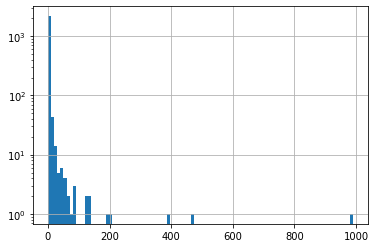

In [20]:
shape_cnt = df.groupby("shape")["image"].count().reset_index()
shape_cnt.columns = ["shape","count"]
shape_cnt["count"].hist(bins=100)
plt.yscale("log")

<AxesSubplot:>

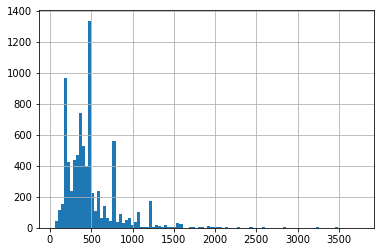

In [22]:
df.height.hist(bins=100)

<AxesSubplot:>

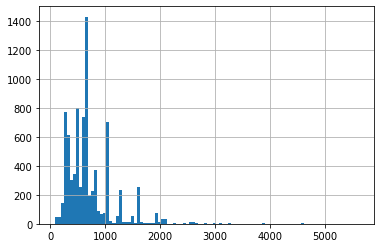

In [23]:
df.width.hist(bins=100)

In [16]:
df.dtypes

image     object
height     int64
width      int64
depth      int64
label      int64
dtype: object

In [17]:
df.describe()

,height,width,depth,label
count,8144.000000,8144.000000,8144.0,8144.000000
mean,482.748404,699.816675,3.0,97.979371
std,317.565971,450.920991,0.0,56.503148
min,57.000000,78.000000,3.0,0.000000
25%,290.000000,429.000000,3.0,49.000000
50%,424.000000,637.000000,3.0,98.000000
75%,540.000000,800.000000,3.0,147.000000
max,3744.000000,5616.000000,3.0,195.000000


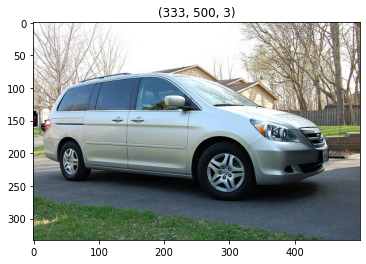

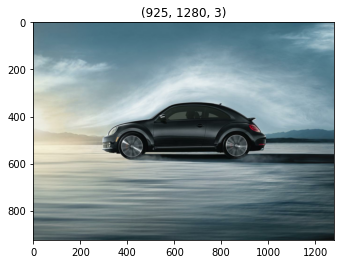

In [6]:
import matplotlib.pyplot as plt

plt.imshow(df.loc[2010,"image"])
plt.title(df.loc[2010,"shape"])
plt.show()
plt.imshow(df.loc[7544,"image"])
plt.title(df.loc[7544,"shape"])
plt.show()